In [1]:
# importing all required modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection  import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc

%matplotlib inline

## Exploring data

In [2]:
data = pd.read_csv('/home/sunil/Downloads/Movie_Review_Dataset.csv')
data.head()

,Review,Sentiment
0,films adapted from comic books have had plenty...,pos
1,every now and then a movie comes along from a ...,pos
2,you ' ve got mail works alot better than it de...,pos
3,""" jaws "" is a rare film that grabs your attent...",pos
4,moviemaking is a lot like being the general ma...,pos


In [3]:
# number of Reviews

len(data)

2000

pos    1000
neg    1000
Name: Sentiment, dtype: int64


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

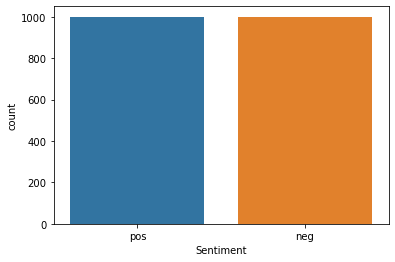

In [4]:
# number of positive and negative Reviews

print(data.Sentiment.value_counts())
sns.countplot(x = 'Sentiment', data = data)

In [5]:
# mapping labels to 0 and 1

data['label'] = data.Sentiment.map({'neg':0, 'pos':1})

In [6]:
data.head()

,Review,Sentiment,label
0,films adapted from comic books have had plenty...,pos,1
1,every now and then a movie comes along from a ...,pos,1
2,you ' ve got mail works alot better than it de...,pos,1
3,""" jaws "" is a rare film that grabs your attent...",pos,1
4,moviemaking is a lot like being the general ma...,pos,1


In [7]:
# we can now drop the column 'Sentiment'

data = data.drop('Sentiment', axis=1)
data.head()

,Review,label
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,you ' ve got mail works alot better than it de...,1
3,""" jaws "" is a rare film that grabs your attent...",1
4,moviemaking is a lot like being the general ma...,1


average length of positive review is : 4134.962


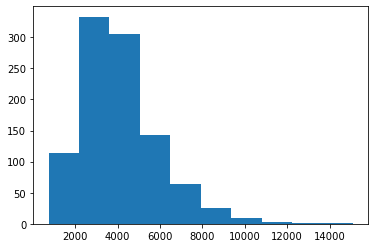

In [8]:
data_with_label_1 = data.loc[data['label'] == 1]
data_with_label_1['length'] = data_with_label_1['Review'].str.len()
plt.hist(data_with_label_1.length)
print('average length of positive review is :',data_with_label_1.length.mean())

average length of negative review is : 3673.558


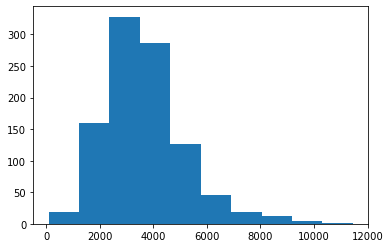

In [9]:
data_with_label_0 = data.loc[data['label'] == 0]
data_with_label_0['length'] = data_with_label_0['Review'].str.len()
plt.hist(data_with_label_0.length)
print('average length of negative review is :',data_with_label_0.length.mean())

## Data Preprocessing

In [10]:
# convert to X and y

X = data.Review
y = data.label
print(X.shape)
print(y.shape)

(2000,)
(2000,)


In [11]:
# splitting into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
X_train.head()

650     james cmaeron ' s breakthrough feature was the...
1104    this is not a simple plan about finding a plan...
561     the seasoned capt . dudley smith ( james cromw...
643     in ` enemy at the gates ' , jude law is a gift...
441     call me crazy , but i don ' t see saving priva...
Name: Review, dtype: object

In [13]:
y_train.head()

650     1
1104    0
561     1
643     1
441     1
Name: label, dtype: int64

In [14]:
# vectorizing the sentences; removing stop words

vect = CountVectorizer(stop_words='english')

In [15]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [16]:
# printing the vocabulary

vect.vocabulary_

{'james': 16435,
 'cmaeron': 5910,
 'breakthrough': 4042,
 'feature': 11353,
 'films': 11594,
 'showcase': 27894,
 'obsession': 21323,
 'technology': 30844,
 'specfically': 28981,
 'run': 26519,
 'amok': 1454,
 'know': 17230,
 'plot': 23223,
 '2029': 206,
 'machines': 18564,
 'engineered': 10236,
 'nuclear': 21176,
 'expressed': 10948,
 'purpose': 24420,
 'wiping': 34264,
 'human': 14931,
 'race': 24603,
 'survivors': 30329,
 'systematically': 30555,
 'hunted': 15005,
 'destroyed': 8334,
 'humans': 14946,
 'fighting': 11546,
 'led': 17701,
 'heroic': 14372,
 'john': 16658,
 'connor': 6551,
 'stop': 29662,
 'send': 27391,
 'terminator': 30987,
 'arnold': 1966,
 'schwarzenegger': 27037,
 '1984': 175,
 'murder': 20421,
 'mother': 20215,
 'sara': 26783,
 'linda': 18023,
 'hamilton': 13838,
 'prevent': 23839,
 'born': 3826,
 'response': 25740,
 'protector': 24185,
 'kyle': 17351,
 'reese': 25175,
 'played': 23164,
 'michael': 19580,
 'biehn': 3288,
 'images': 15244,
 'reliance': 25386,
 'do

In [17]:
# vocab size

len(vect.vocabulary_.keys())

34847

In [18]:
# transforming the train and test datasets

X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [19]:
# note that the type is transformed (sparse) matrix

print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 175)	5
  (0, 206)	3
  (0, 586)	1
  (0, 1454)	1
  (0, 1648)	1
  (0, 1732)	1
  (0, 1828)	1
  (0, 1946)	1
  (0, 1966)	2
  (0, 1992)	1
  (0, 1994)	1
  (0, 2006)	1
  (0, 2429)	1
  (0, 2811)	1
  (0, 3049)	1
  (0, 3153)	1
  (0, 3222)	1
  (0, 3273)	1
  (0, 3288)	1
  (0, 3826)	1
  (0, 4042)	1
  (0, 4144)	1
  (0, 4262)	1
  (0, 4300)	1
  (0, 4454)	1
  :	:
  (1499, 33678)	1
  (1499, 33721)	1
  (1499, 33793)	2
  (1499, 33803)	1
  (1499, 33838)	2
  (1499, 33914)	1
  (1499, 33915)	1
  (1499, 33990)	1
  (1499, 34062)	1
  (1499, 34082)	1
  (1499, 34127)	1
  (1499, 34129)	1
  (1499, 34199)	1
  (1499, 34285)	1
  (1499, 34351)	1
  (1499, 34406)	1
  (1499, 34410)	1
  (1499, 34414)	1
  (1499, 34426)	2
  (1499, 34445)	1
  (1499, 34455)	1
  (1499, 34499)	1
  (1499, 34522)	2
  (1499, 34562)	1
  (1499, 34628)	2


##  Building Model

In [20]:
# training the NB model and making predictions
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [21]:
mnb.get_params

<bound method BaseEstimator.get_params of MultinomialNB()>

## Model Evaluation

In [22]:
# printing the overall accuracy

metrics.accuracy_score(y_test, y_pred_class)

0.796

In [23]:
# confusion matrix

metrics.confusion_matrix(y_test, y_pred_class)

array([[195,  50],
       [ 52, 203]])

In [24]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[195  50]
 [ 52 203]]


In [25]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.796078431372549


In [26]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.7959183673469388


In [27]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.8023715415019763
0.8023715415019763


In [28]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.8023715415019763
PRECISION SCORE : 0.8023715415019763
RECALL SCORE : 0.796078431372549
F1 SCORE : 0.7992125984251968


In [29]:
# creating an ROC curve


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [30]:
# area under the curve

print (roc_auc)

0.8722849139655864


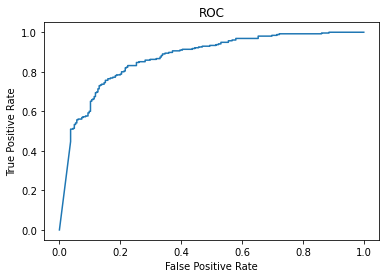

In [31]:
# plotting the ROC curve
  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)